# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [23]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment
index_col = 'date'
test_split = 0.3

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [2]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [19]:

df = pd.read_csv('./power_demand_vs_temperature.csv', index_col=index_col)


### Explore the dataset and check for missing values


,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [13]:
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


In [14]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


The dataframe has 0 invalid rows


In [15]:
invalid_no = df.shape[0] - df.dropna().shape[0]
print(f"The dataframe has {invalid_no} invalid rows")

The dataframe has 0 invalid rows


### Create X and y 

X has shape(1096, 1)
Y has shape(1096,)


In [20]:
X = df.drop('demand', axis=1)
y = df['demand']
print(f'X has shape {X.shape}')
print(f'y has shape {y.shape}')

X has shape (1096, 1)
y has shape (1096,)


### Plot the distribution



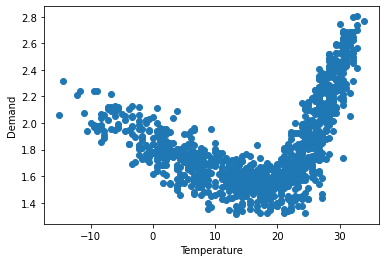

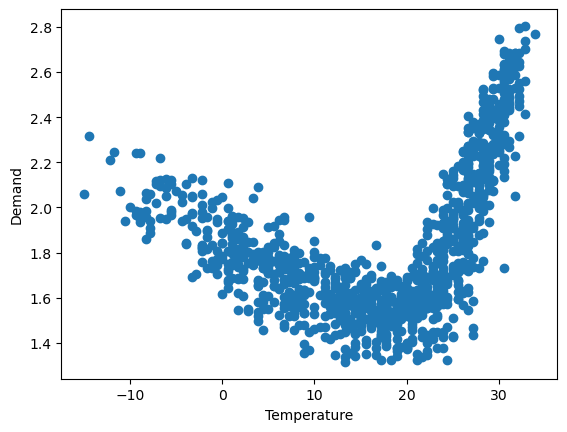

In [21]:
plt.scatter(X, y)
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.show()

### Divide the dataset in train and test splits

Training set and test set have 767 and 329 elements respectively


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=random_state)
print(f'Training and test set has sizes {X_train.shape[0]} and {X_test.shape[0]} respectively')

Training and test set has sizes 767 and 329 respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [25]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    # f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p

def print_eval(X, y, model):
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(pred, y), F, p


## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


 Mean squared error: 	0.10016
 r2 score: 		0.1803
 f-statistic: 		53.273
 p-value: 		2.2197e-12


In [27]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_eval = print_eval(X_test, y_test, lin_model)

 Mean squared error: 	0.10165
 r2 score: 		0.16809
 f-statistic: 		44.576
 p-value: 		1.0503e-10


#### Visualize the prediction of the model 

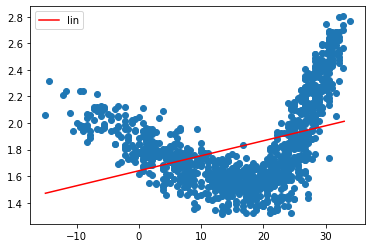

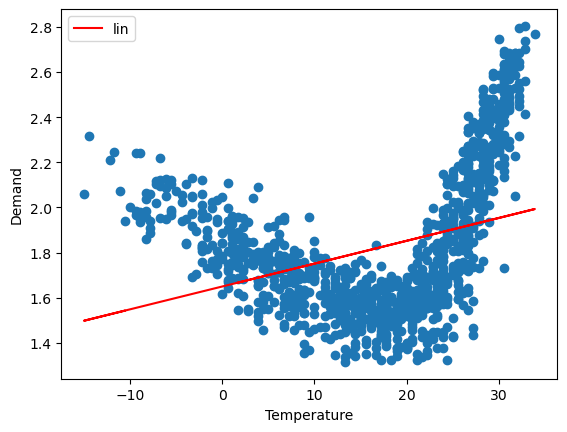

In [30]:
plt.scatter(X, y)
plt.plot(X, lin_model.predict(X), color='red', label='lin')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.legend()
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

LinearRegression()

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

 Mean squared error: 	0.033456
 r2 score: 		0.72619
 f-statistic: 		384.89
 p-value: 		1.1102e-16


In [41]:
pol_eval = print_eval(poly_features.transform(X_test), y_test, poly_model)

 Mean squared error: 	0.032967
 r2 score: 		0.7302
 f-statistic: 		408.06
 p-value: 		1.1102e-16


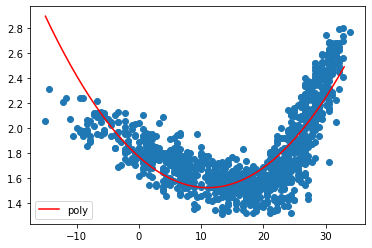

/Users/srand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


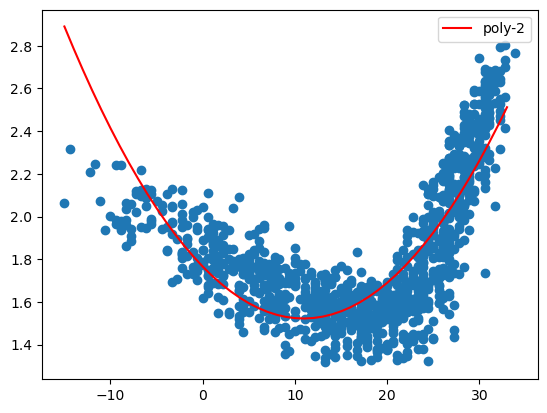

In [40]:
range = np.arange(min(X.temp), max(X.temp)).reshape(-1, 1)
pred = poly_model.predict(poly_features.transform(range))
plt.plot(np.arange(min(X.temp), max(X.temp)), pred, color='red', label='poly-2')
plt.scatter(X, y)
plt.legend()
plt.show()

## Third experiment

#### Polynomial degree = 3

Polynomial degree = 3


LinearRegression()

In [43]:
pol3_features = PolynomialFeatures(degree=3, include_bias=False)
print("Polynomial degree = 3")

X_poly = pol3_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)


Polynomial degree = 3


LinearRegression()

 Mean squared error: 	0.021749
 r2 score: 		0.822
 f-statistic: 		502.32
 p-value: 		1.1102e-16


In [44]:
pol3_eval = print_eval(pol3_features.transform(X_test), y_test, model)

 Mean squared error: 	0.021749
 r2 score: 		0.822
 f-statistic: 		502.32
 p-value: 		1.1102e-16


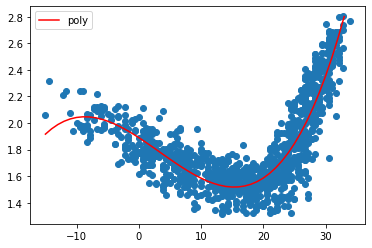

/Users/srand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


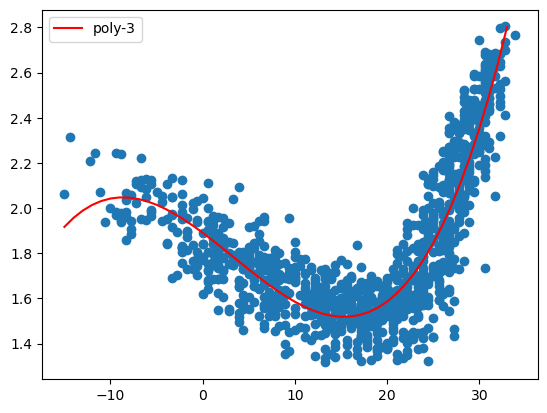

In [45]:
x_range = np.arange(min(X.temp), max(X.temp))
pred = model.predict(pol3_features.transform(x_range.reshape(-1, 1)))
plt.scatter(X, y)
plt.plot(x_range, pred, color='red', label='poly-3')
plt.legend()
plt.show()

## Fourth experiment
### Polynomial degree = 4

Polynomial degree = 4


LinearRegression()

In [46]:
pol4_features = PolynomialFeatures(degree=4, include_bias=False)
print('Polinomial degree = 4')

X_poly = pol4_features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

Polinomial degree = 4


LinearRegression()

 Mean squared error: 	0.021334
 r2 score: 		0.8254
 f-statistic: 		390.05
 p-value: 		1.1102e-16


In [47]:
pol4_eval = print_eval(pol4_features.transform(X_test), y_test, model)

 Mean squared error: 	0.021334
 r2 score: 		0.8254
 f-statistic: 		390.05
 p-value: 		1.1102e-16


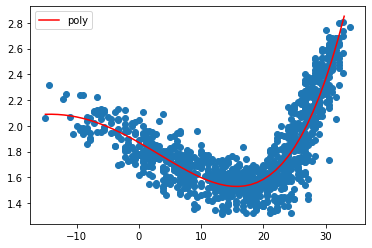

/Users/srand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


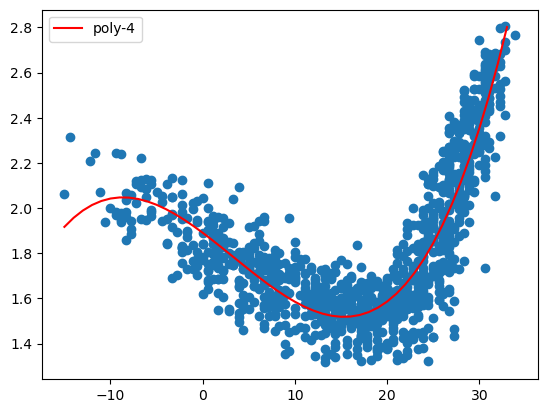

In [48]:
X_range = np.arange(min(X.temp), max(X.temp))
model.predict(pol4_features.transform(x_range.reshape(-1, 1)))

plt.scatter(X, y)
plt.plot(x_range, pred, color='red', label='poly-4')
plt.legend()
plt.show()

## Compare the performance of the four models

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
rmse,1.001591e-01,3.345625e-02,2.174942e-02,2.133387e-02
r2,-5.366169e+00,5.756325e-01,7.843318e-01,7.923317e-01
f-statistic,5.327309e+01,3.848865e+02,5.023183e+02,3.900454e+02
p-value,2.219669e-12,1.110223e-16,1.110223e-16,1.110223e-16


In [49]:
performance = {
    'linear': [*lin_eval],
    'polynomial d=2': [*pol_eval],
    'polynomial d=3': [*pol3_eval],
    'polynomial d=4': [*pol4_eval],
}

results = pd.DataFrame(performance, index=['rmse', 'r2', 'f-statistics', 'p-value'])
results

,linear,polynomial d=2,polynomial d=3,polynomial d=4
rmse,1.016508e-01,3.296681e-02,2.174942e-02,2.133387e-02
r2,-7.031040e+00,6.001856e-01,7.843318e-01,7.923317e-01
f-statistics,4.457638e+01,4.080611e+02,5.023183e+02,3.900454e+02
p-value,1.050272e-10,1.110223e-16,1.110223e-16,1.110223e-16
